<h1>Redes neuronales cuanticas</h1>

<p>En este documento se revisaran los diferentes tipos de redes neuronales cuanticas(QNN), las implementaciones que provee <em>qiskit-machine-learning</em</p>
<p>Desde el punto de vista del aprendizaje automático, las QNN son, una vez más, modelos algorítmicos que pueden entrenarse para encontrar patrones ocultos en los datos de forma similar a sus homólogos clásicos. Estos modelos pueden cargar datos clásicos (entradas) en un estado cuántico y, posteriormente, procesarlos con puertas cuánticas parametrizadas por pesos entrenables. El resultado de la medición de este estado puede introducirse en una función de pérdida para entrenar los pesos mediante retropropagación.</p>

<h2>1. Implementacion en <em>qisik-machine-learning<em></h2>

In [19]:
from qiskit.utils import algorithm_globals

algorithm_globals.random_seed = 42

<h3>2. Como instanciar las QNN (Redes neuronales cuanticas)</h2>

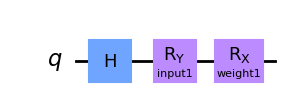

In [20]:
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit

params1 = [Parameter("input1"), Parameter("weight1")] #Parameter se utiliza para definir los parametros simbolicos en el circuito
qc1 = QuantumCircuit(1) #Quantum circuit es la clase que nos permite construir y manipular circuitos cuanticos el numero indica la cantidad de qubits
qc1.h(0)                        #Se agrega la compuerta hadamard al qubit 0
qc1.ry(params1[0], 0)           #Compuerta de rotacion en el eje Y, al qubit 0, con el primer parametro como el angulo de rotacion
qc1.rx(params1[1], 0)           
qc1.draw("mpl")

In [21]:
from qiskit.quantum_info import SparsePauliOp

observable1 = SparsePauliOp.from_list([("Y" * qc1.num_qubits, 1)])

In [22]:
from qiskit_machine_learning.neural_networks import EstimatorQNN

estimator_qnn = EstimatorQNN(circuit=qc1, observables=observable1, input_params=[params1[0]], weight_params=[params1[1]])
estimator_qnn

input parameters: ['input[0]', 'input[1]']
weight parameters: ['weight[0]', 'weight[1]', 'weight[2]', 'weight[3]']


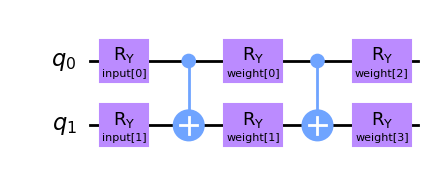

In [23]:
from qiskit.circuit import ParameterVector

inputs2 = ParameterVector("input", 2)
weights2 = ParameterVector("weight", 4)
print(f"input parameters: {[str(item) for item in inputs2.params]}")
print(f"weight parameters: {[str(item) for item in weights2.params]}")

qc2 = QuantumCircuit(2)
qc2.ry(inputs2[0], 0)
qc2.ry(inputs2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[0], 0)
qc2.ry(weights2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[2], 0)
qc2.ry(weights2[3], 1)

qc2.draw(output="mpl")

In [24]:
from qiskit_machine_learning.neural_networks import SamplerQNN

sampler_qnn = SamplerQNN(circuit=qc2, input_params=inputs2, weight_params=weights2)
sampler_qnn

In [25]:
estimator_qnn_input = algorithm_globals.random.random(estimator_qnn.num_inputs)
estimator_qnn_weights = algorithm_globals.random.random(estimator_qnn.num_weights)

In [26]:
print(f"Number of input features for EstimatorQNN: {estimator_qnn.num_inputs} \nInput: {estimator_qnn_input}")
print(f"Number of trainable weights for EstimatorQNN: {estimator_qnn.num_weights} \nWeights: {estimator_qnn_weights}")

Number of input features for EstimatorQNN: 1 
Input: [0.77395605]
Number of trainable weights for EstimatorQNN: 1 
Weights: [0.43887844]


In [27]:
sampler_qnn_input = algorithm_globals.random.random(sampler_qnn.num_inputs)
sampler_qnn_weights = algorithm_globals.random.random(sampler_qnn.num_weights)

In [28]:
print(f"Number of input features for SamplerQNN: {sampler_qnn.num_inputs} \nInput: {sampler_qnn_input}")
print(f"Number of trainable weights for SamplerQNN: {sampler_qnn.num_weights} \nWeights: {sampler_qnn_weights}")

Number of input features for SamplerQNN: 2 
Input: [0.85859792 0.69736803]
Number of trainable weights for SamplerQNN: 4 
Weights: [0.09417735 0.97562235 0.7611397  0.78606431]


In [29]:
estimator_qnn_forward = estimator_qnn.forward(estimator_qnn_input, estimator_qnn_weights)

print(f"Forward pass result for EstimatorQNN: {estimator_qnn_forward}. \nShape: {estimator_qnn_forward.shape}")

Forward pass result for EstimatorQNN: [[0.2970094]]. 
Shape: (1, 1)


In [30]:
sampler_qnn_forward = sampler_qnn.forward(sampler_qnn_input, sampler_qnn_weights)

print(f"Forward pass result for SamplerQNN: {sampler_qnn_forward}.  \nShape: {sampler_qnn_forward.shape}")

Forward pass result for SamplerQNN: [[0.01826527 0.25735654 0.5267981  0.19758009]].  
Shape: (1, 4)


In [31]:
estimator_qnn_forward_batched = estimator_qnn.forward([estimator_qnn_input, estimator_qnn_input], estimator_qnn_weights)
print(f"Forward pass result for EstimatorQNN: {estimator_qnn_forward_batched}.  \nShape: {estimator_qnn_forward_batched.shape}")

Forward pass result for EstimatorQNN: [[0.2970094]
 [0.2970094]].  
Shape: (2, 1)


In [32]:
sampler_qnn_forward_batched = sampler_qnn.forward([sampler_qnn_input, sampler_qnn_input], sampler_qnn_weights)
print(f"Forward pass result for SamplerQNN: {sampler_qnn_forward_batched}.  \nShape: {sampler_qnn_forward_batched.shape}")

Forward pass result for SamplerQNN: [[0.01826527 0.25735654 0.5267981  0.19758009]
 [0.01826527 0.25735654 0.5267981  0.19758009]].  
Shape: (2, 4)


In [34]:
estimator_qnn_input_grad, estimator_qnn_weight_grad = estimator_qnn.backward(estimator_qnn_input, estimator_qnn_weights)
print(f"Input gradients for EstimatorQNN: {estimator_qnn_input_grad}.  \nShape: {estimator_qnn_input_grad}")
print(f"Weight gradients for EstimatorQNN: {estimator_qnn_weight_grad}.  \nShape: {estimator_qnn_weight_grad.shape}")

Input gradients for EstimatorQNN: None.  
Shape: None
Weight gradients for EstimatorQNN: [[[0.63272767]]].  
Shape: (1, 1, 1)


In [36]:
sampler_qnn_input_grad, sampler_qnn_weight_grad = sampler_qnn.backward(sampler_qnn_input, sampler_qnn_weights)
print(f"Input gradients for SamplerQNN: {sampler_qnn_input_grad}.  \nShape: {sampler_qnn_input_grad}")
print(f"Weight gradients for SamplerQNN: {sampler_qnn_weight_grad}.  \nShape: {sampler_qnn_weight_grad.shape}")

Input gradients for SamplerQNN: None.  
Shape: None
Weight gradients for SamplerQNN: [[[ 0.00606238 -0.1124595  -0.06856156 -0.09809236]
  [ 0.21167414 -0.09069775  0.06856156 -0.22549618]
  [-0.48846674  0.32499215 -0.32262178  0.09809236]
  [ 0.27073021 -0.12183491  0.32262178  0.22549618]]].  
Shape: (1, 4, 4)


In [37]:
estimator_qnn.input_gradients = True
sampler_qnn.input_gradients = True

In [38]:
estimator_qnn_input_grad, estimator_qnn_weight_grad = estimator_qnn.backward(estimator_qnn_input, estimator_qnn_weights)
print(f"Input gradients for EstimatorQNN: {estimator_qnn_input_grad}.  \nShape: {estimator_qnn_input_grad.shape}")
print(f"Weight gradients for EstimatorQNN: {estimator_qnn_weight_grad}.  \nShape: {estimator_qnn_weight_grad.shape}")

Input gradients for EstimatorQNN: [[[0.3038852]]].  
Shape: (1, 1, 1)
Weight gradients for EstimatorQNN: [[[0.63272767]]].  
Shape: (1, 1, 1)


In [39]:
sampler_qnn_input_grad, sampler_qnn_weight_grad = sampler_qnn.backward(sampler_qnn_input, sampler_qnn_weights)
print(f"Input gradients for SamplerQNN: {sampler_qnn_input_grad}.  \nShape: {sampler_qnn_input_grad.shape}")
print(f"Weight gradients for SamplerQNN: {sampler_qnn_weight_grad}.  \nShape: {sampler_qnn_weight_grad.shape}")

Input gradients for SamplerQNN: [[[-0.05844702 -0.10621091]
  [ 0.38798796 -0.19544083]
  [-0.34561132  0.09459601]
  [ 0.01607038  0.20705573]]].  
Shape: (1, 4, 2)
Weight gradients for SamplerQNN: [[[ 0.00606238 -0.1124595  -0.06856156 -0.09809236]
  [ 0.21167414 -0.09069775  0.06856156 -0.22549618]
  [-0.48846674  0.32499215 -0.32262178  0.09809236]
  [ 0.27073021 -0.12183491  0.32262178  0.22549618]]].  
Shape: (1, 4, 4)


In [40]:
observable2 = SparsePauliOp.from_list([("Z" * qc1.num_qubits, 1)])

estimator_qnn2 = EstimatorQNN(
    circuit=qc1,
    observables=[observable1, observable2],
    input_params=[params1[0]],
    weight_params=[params1[1]],
)

In [41]:
estimator_qnn_forward2 = estimator_qnn2.forward(estimator_qnn_input, estimator_qnn_weights)
estimator_qnn_input_grad2, estimator_qnn_weight_grad2 = estimator_qnn2.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(f"Forward output for EstimatorQNN1: {estimator_qnn_forward.shape}")
print(f"Forward output for EstimatorQNN2: {estimator_qnn_forward2.shape}")
print(f"Backward output for EstimatorQNN1: {estimator_qnn_weight_grad.shape}")
print(f"Backward output for EstimatorQNN2: {estimator_qnn_weight_grad2.shape}")

Forward output for EstimatorQNN1: (1, 1)
Forward output for EstimatorQNN2: (1, 2)
Backward output for EstimatorQNN1: (1, 1, 1)
Backward output for EstimatorQNN2: (1, 2, 1)


In [42]:
parity = lambda x: "{:b}".format(x).count("1") % 2
output_shape = 2  # parity = 0, 1

sampler_qnn2 = SamplerQNN(
    circuit=qc2,
    input_params=inputs2,
    weight_params=weights2,
    interpret=parity,
    output_shape=output_shape,
)

In [43]:
sampler_qnn_forward2 = sampler_qnn2.forward(sampler_qnn_input, sampler_qnn_weights)
sampler_qnn_input_grad2, sampler_qnn_weight_grad2 = sampler_qnn2.backward(
    sampler_qnn_input, sampler_qnn_weights
)

print(f"Forward output for SamplerQNN1: {sampler_qnn_forward.shape}")
print(f"Forward output for SamplerQNN2: {sampler_qnn_forward2.shape}")
print(f"Backward output for SamplerQNN1: {sampler_qnn_weight_grad.shape}")
print(f"Backward output for SamplerQNN2: {sampler_qnn_weight_grad2.shape}")

Forward output for SamplerQNN1: (1, 4)
Forward output for SamplerQNN2: (1, 2)
Backward output for SamplerQNN1: (1, 4, 4)
Backward output for SamplerQNN2: (1, 2, 4)


In [44]:
import qiskit.tools.jupyter

%qiskit_version_table
%qiskit_copyright